In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import warnings as wr
import scipy
wr.filterwarnings("ignore") #to ignore the warnings

In [2]:
df_raw = pd.read_csv(r"C:\Users\T2ABIZZ\Documents\Datasets\IT_SALARY_SURVEY\IT_Salary_Survey_EU _2020.csv")
df = df_raw.copy()
df.rename(columns={"Position ": "Position",
                    })
df.dtypes

Timestamp                                                                                                                   object
Age                                                                                                                        float64
Gender                                                                                                                      object
City                                                                                                                        object
Position                                                                                                                    object
Total years of experience                                                                                                   object
Years of experience in Germany                                                                                              object
Seniority level                                                                    

as we can see there is columns that is object and should be float, So we must convert them.

# Cleaning the dataset

In [3]:
df = df_raw.replace(',', '.', regex=True)
df.rename(columns={"Position ":"Position"},inplace=True)

In [4]:
df.loc[(df['Total years of experience']=='1 (as QA Engineer) / 11 in total'),'Total years of experience']=1
df.loc[(df['Total years of experience']=='6 (not as a data scientist. but as a lab scientist)'),'Total years of experience']=6
df.loc[(df['Total years of experience']=='15. thereof 8 as CTO'),'Total years of experience']=15
df.loc[(df['Total years of experience']=='less than year'),'Total years of experience']=0
df.loc[(df["Employment status"]=="Company Director") |
       (df["Employment status"]=="Founder") |
       (df["Employment status"]=="full-time. but 32 hours per week (it was my request. I'm a student)")
       ,"Employment status"]="Full-time employee"
df.loc[(df["Employment status"]=="working student") |
       (df["Employment status"]=="Working Student") |
       (df["Employment status"]=="Full-time position. part-time position. & self-employed (freelancing. tutoring)")|
       (df["Employment status"]=="Werkstudent") 
       ,"Employment status"]="Part-time employee"
df['Total years of experience'].fillna(df['Years of experience in Germany'], inplace=True)
df['Years of experience in Germany'].fillna(df['Total years of experience'], inplace=True)

In [5]:
df["Сontract duration"].unique()

array(['Unlimited contract', 'Temporary contract', nan, '0'], dtype=object)

In [6]:
a = pd.to_numeric(df["Years of experience in Germany"], errors='coerce')
idx = a.isna()
df.loc[idx, 'Years of experience in Germany'] = df.loc[idx, 'Total years of experience']
df[idx] 


,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
12,24/11/2020 11:18:22,NaN,NaN,Berlin,Software Engineer,NaN,NaN,Lead,PHP,NaN,...,NaN,NaN,Full-time employee,Unlimited contract,English,1000+,NaN,No,NaN,1000
343,24/11/2020 17:43:34,45.0,Male,Munich,Frontend Developer,3,3,Senior,Javascript / Typescript,NaN,...,NaN,25,Full-time employee,Unlimited contract,Russian,11-50,Startup,Yes,NaN,NaN
392,24/11/2020 19:14:03,37.0,Male,Zurich,Project manager,20,20,Middle,NaN,NaN,...,10000,25,Full-time employee,Unlimited contract,English,1000+,Consulting / Agency,No,NaN,300
473,25/11/2020 03:27:34,NaN,NaN,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,25/11/2020 14:56:08,23.0,Male,Berlin,Dana Analyst,4,4,Middle,NaN,Python. SQL,...,NaN,26,Full-time employee,Unlimited contract,English,11-50,Product,No,NaN,NaN
702,25/11/2020 21:10:17,37.0,Male,Stuttgart,Backend Developer,NaN,NaN,Senior,C#,NaN,...,NaN,30,Full-time employee,Unlimited contract,NaN,NaN,NaN,No,NaN,NaN
750,26/11/2020 10:07:39,25.0,Female,Tampere (Finland),computer vision researcher,3,3,Junior,Python,Python. Tensorflow. Theano. Pytorch,...,NaN,30,Full-time employee,Temporary contract,English,51-100,Science Institute,No,NaN,NaN
847,27/11/2020 14:14:20,28.0,Male,Warsaw. Poland,Software Engineer,6,6,Middle,C#,Javascript / Typescript. .NET. SQL,...,3900,26,Full-time employee,Unlimited contract,English,51-100,Consulting / Agency,No,NaN,0
867,27/11/2020 18:27:25,23.0,Male,Munich,ML Engineer,1,1,Junior,Python,C/C++. SQL. Google Cloud. Docker,...,NaN,NaN,Full-time employee,Unlimited contract,English,101-1000,Product,Yes,NaN,NaN
883,28/11/2020 05:36:11,27.0,Male,Hamburg,Backend Developer,3,3,Middle,.net,Javascript / Typescript. .NET. SQL. Docker,...,NaN,NaN,Part-time employee,Temporary contract,English,11-50,Consulting / Agency,No,NaN,NaN


In [7]:
df["Years of experience in Germany"].isna().values
df[df["Years of experience in Germany"].isna()]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
12,24/11/2020 11:18:22,NaN,NaN,Berlin,Software Engineer,NaN,NaN,Lead,PHP,NaN,...,NaN,NaN,Full-time employee,Unlimited contract,English,1000+,NaN,No,NaN,1000
473,25/11/2020 03:27:34,NaN,NaN,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
702,25/11/2020 21:10:17,37.0,Male,Stuttgart,Backend Developer,NaN,NaN,Senior,C#,NaN,...,NaN,30,Full-time employee,Unlimited contract,NaN,NaN,NaN,No,NaN,NaN
1180,20/12/2020 00:30:53,NaN,NaN,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1181,20/12/2020 00:31:23,NaN,NaN,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1231,08/01/2021 12:52:08,NaN,NaN,Munich,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:

df = df.astype({
    "Total years of experience":"float64",
    "Years of experience in Germany":"float64",
    "Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country":"float64",
    "Main language at work":'category',

 })

In [9]:
print(df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype   
---  ------                                                                                                                   --------------  -----   
 0   Timestamp                                                                                                                1253 non-null   object  
 1   Age                                                                                                                      1226 non-null   float64 
 2   Gender                                                                                                                   1243 non-null   object  
 3   City                                                                                                                     1253 non-nul

In [10]:
numerical_feautures=df.select_dtypes(include=[np.number])
numerical_feautures.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1226.0,3.250979e+01,5.663804e+00,20.0,29.0,32.0,35.0,6.900000e+01
Total years of experience,1247.0,9.038172e+00,1.185861e+01,0.0,5.0,8.0,12.0,3.830000e+02
Years of experience in Germany,1247.0,3.817562e+00,3.730597e+00,0.0,1.0,3.0,5.0,3.000000e+01
Yearly brutto salary (without bonus and stocks) in EUR,1253.0,8.027904e+07,2.825061e+09,10001.0,58800.0,70000.0,80000.0,1.000000e+11
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,885.0,6.322459e+05,1.680508e+07,11000.0,55000.0,65000.0,75000.0,5.000000e+08
"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",373.0,1.296783e+01,1.527517e+01,0.0,0.0,0.0,30.0,4.000000e+01


as we can see there is some outliers in Yearly brutto salary , Let's drop it!

In [11]:
Q1 = np.percentile(df['Yearly brutto salary (without bonus and stocks) in EUR'], 25, method='midpoint')
Q3 = np.percentile(df['Yearly brutto salary (without bonus and stocks) in EUR'], 75, method='midpoint')
IQR = Q3 - Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
upper_array = np.where(df['Yearly brutto salary (without bonus and stocks) in EUR']>=upper)[0]
lower_array = np.where(df['Yearly brutto salary (without bonus and stocks) in EUR']<=lower)[0]
print(IQR)
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

21200.0


In [12]:
df.dropna(subset=["Total years of experience","Years of experience in Germany"],how="all",inplace=True)

# Observation
- Age varies from 20 to 66 and the mean age is 32
- 

In [13]:
df.duplicated().sum()

0

# What question do we want to ask of the data?
- What is the distribution of ages among the respondents?
- How is the gender distribution in the dataset?
- What are the different cities represented in the dataset?
- How many vacation days do respondents typically have?
- What is the main language spoken at work for respondents?
- Does total years of experience increase salary?



In [14]:
df['Age'].describe()

count    1145.000000
mean       32.583406
std         5.649299
min        21.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        69.000000
Name: Age, dtype: float64

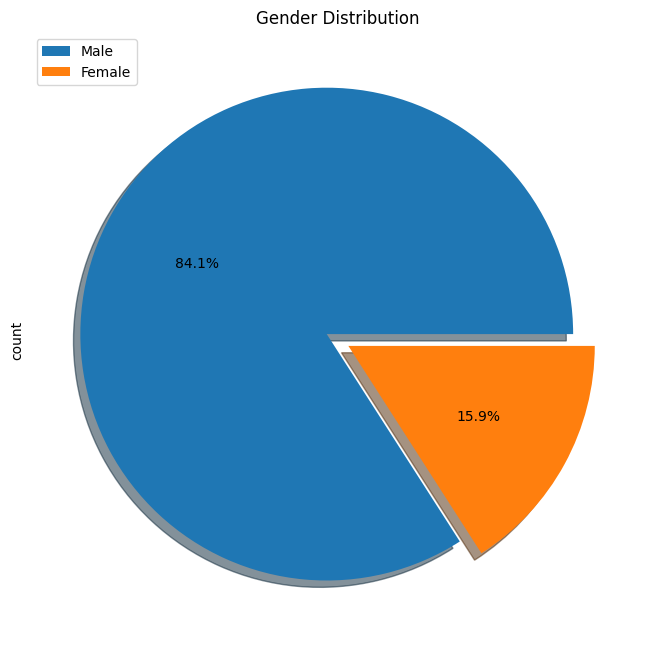

In [15]:
df["Gender"].value_counts().plot.pie(explode=[ 0.05,0.05], autopct='%1.1f%%',labels=['','',''], shadow=True, figsize=(8,8))
plt.title('Gender Distribution')
plt.legend(loc='upper left',labels=df['Gender'].value_counts().index)
plt.show()

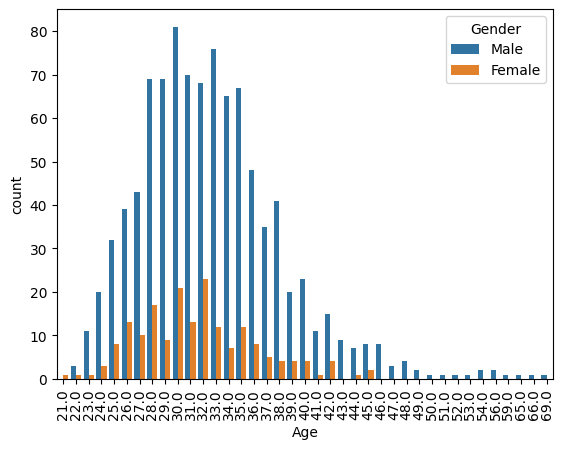

In [16]:
ax = sns.countplot(x="Age",data=df,hue="Gender")
a=ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


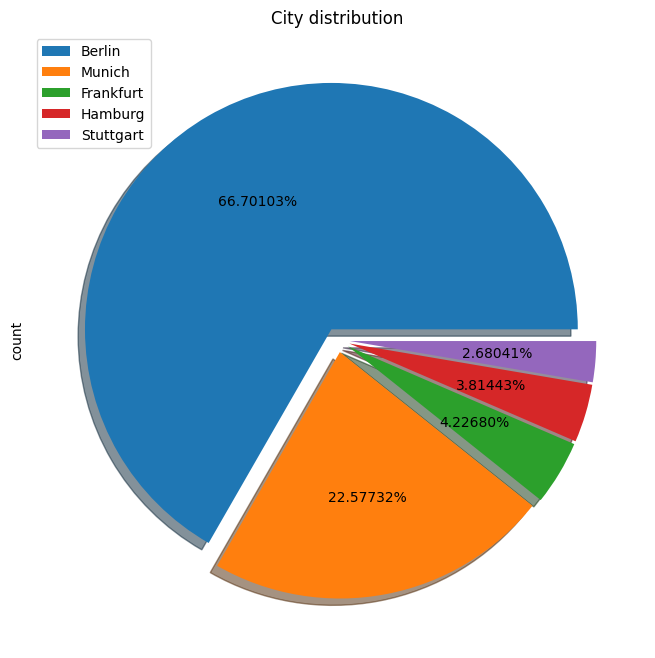

In [17]:
df["City"].value_counts().iloc[:5].plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05],autopct='%1.5f%%',shadow=True,labels=['']*5, figsize=(8,8))
plt.title('City distribution')
plt.legend(loc='upper left',labels=df['City'].value_counts().iloc[:5].index)
plt.show()

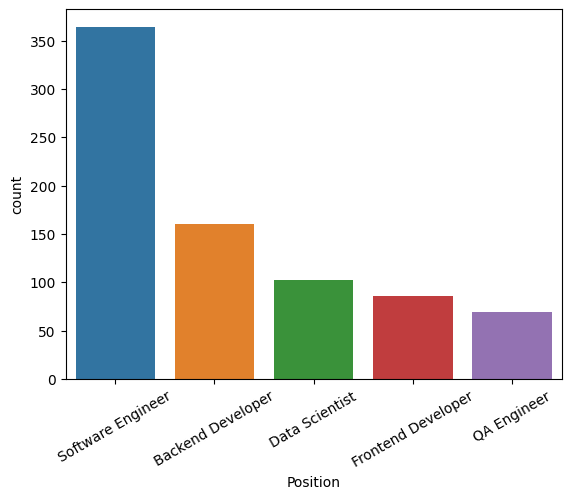

In [18]:
ax = sns.countplot(x=df["Position"],order=df.Position.value_counts().iloc[:5].index)
a=ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

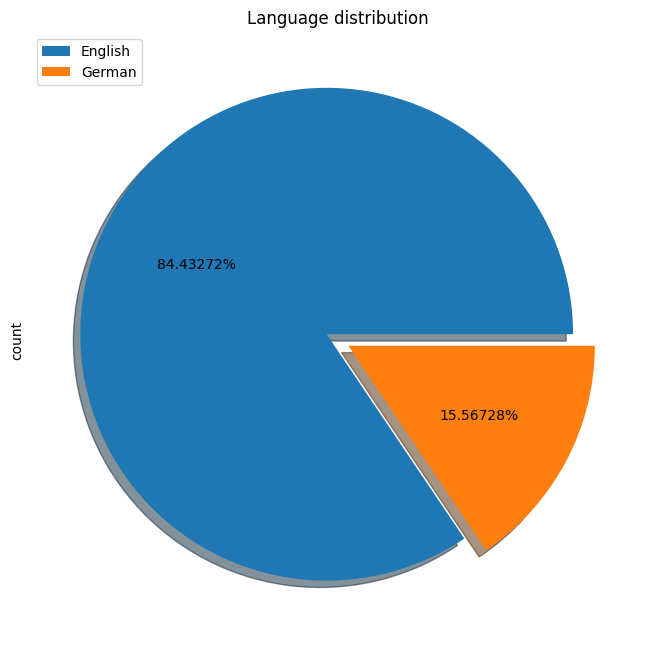

In [19]:
df["Main language at work"].value_counts().iloc[:2].plot.pie(explode=[0.05,0.05],autopct='%1.5f%%',shadow=True,labels=['']*2, figsize=(8,8))
plt.title('Language distribution')
plt.legend(loc='upper left',labels=df['Main language at work'].value_counts().iloc[:2].index)
plt.show()

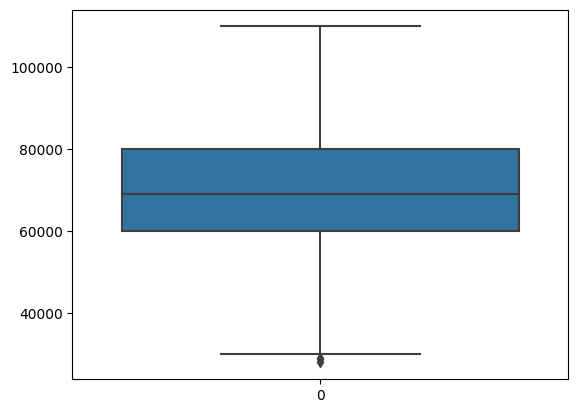

In [20]:
sns.boxplot(df["Yearly brutto salary (without bonus and stocks) in EUR"])
plt.show()

In [27]:
dataset= [df["Yearly brutto salary (without bonus and stocks) in EUR"]]
label=["Salary in euro"]
fig = ff.create_distplot(dataset, label, show_hist = False)
fig.update_layout(title = 'Distribution Plot of Salary in USD') 
fig.show()

# Relationships

In [22]:
df["Position"].value_counts().iloc[:5].sort_values(ascending=False)

Position
Software Engineer     364
Backend Developer     160
Data Scientist        102
Frontend Developer     86
QA Engineer            69
Name: count, dtype: int64

In [23]:
top_p=df.loc[(df["Position"]=="Software Engineer")
             | (df["Position"]=="Backend Developer") 
             | (df["Position"]=="Data Scientist") | 
            (df["Position"]=="Frontend Developer") | 
(df["Position"]=="QA Engineer")]

In [24]:

city=top_p[['City','Position']].value_counts()
city.to_csv('city_p.csv')
city=pd.read_csv('city_p.csv')
city.rename(columns={'0':'count'},inplace=True)
px.bar(city,x="City",y="count",color="Position")

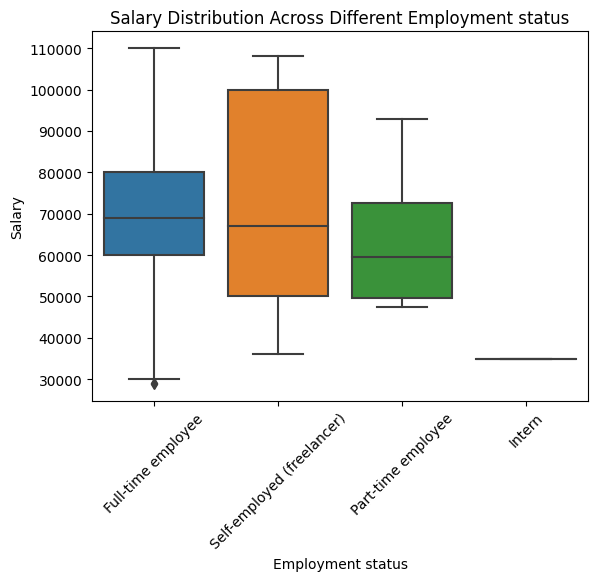

In [25]:

ax=sns.boxplot(data=df,y="Yearly brutto salary (without bonus and stocks) in EUR",x="Employment status")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Salary Distribution Across Different Employment status')
plt.xlabel('Employment status')
plt.ylabel('Salary')
plt.show()

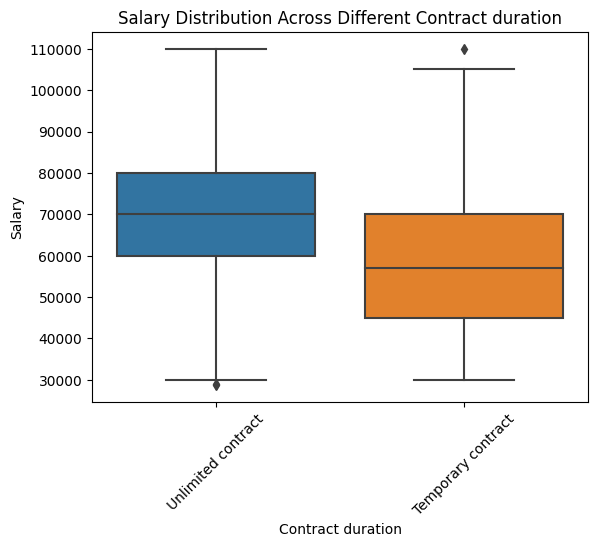

In [26]:

ax=sns.boxplot(data=df,y="Yearly brutto salary (without bonus and stocks) in EUR",x="Сontract duration")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Salary Distribution Across Different Сontract duration')
plt.xlabel('Сontract duration')
plt.ylabel('Salary')
plt.show()